In [4]:
%matplotlib inline
import ipywidgets as widgets;
import matplotlib.pyplot as plt;
import numpy as np;
import warnings;
warnings.filterwarnings('ignore');
import pylab as lp;from pylab import *;
from scipy.ndimage import measurements;
from IPython.display import display,clear_output;
lp.rcParams['figure.figsize'] = (8, 8);
from IPython.display import display,clear_output;


plt.ioff();
ax=plt.gca();
N=1000;
# Change cc and the increment of cc below simultaneously can change the p, increment of cc is 2 times c
cc=-0.02;
dd=0;
R = np.random.random((N,N));
colors = ['red','black','white'];
cmap = mpl.colors.ListedColormap(colors)
out=widgets.Output();
button=widgets.Button(description='Next');
vbox=widgets.VBox(children=(out,button));
display(vbox)
def click(b):
    global cc;    
    cc +=0.02;    
    B = np.where(R < cc, 1, 0);    
    B1=logical_not(B)*1;    
    lw, num = measurements.label(B);
    w=np.max(lw);    
    area = measurements.sum(B, lw, index=arange(lw.max() + 1));    
    sB=B.sum();    w1=np.max(area);
    ix=[i for i, x in enumerate(area) if x == w1];    
    a = np.array(ix);    C = np.where(lw ==a[0], 1, 0);    
    C1 = logical_not(C)*1;
    D=B1+C1;    ama = logical_not(D)*1;    
    sama=ama.sum();    
    p=sB/(N*N); 
    im = ax.imshow(D, cmap=cmap, interpolation='nearest');
    with out:
        clear_output(wait=True);        
        display(ax.figure);                
        print("p= ",p, "c= ",sB,"LC= ",sama," Author: S.Boutiche")
button.on_click(click)
click(None)

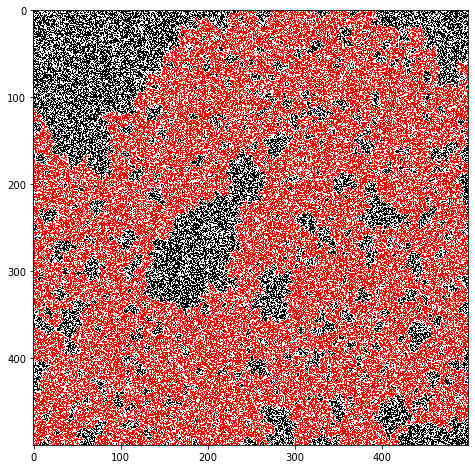

p=  0.59942 c=  149855 LC=  102714  Author: J. Zhao


In [49]:
def Percolation(p, N):
    # site percolation
    
    R = np.random.random((N,N));
    B = np.where(R < p, 1, 0);   
    B1=logical_not(B)*1;    # B1 refers to all the sites which is open, i.e. R >= p. The label is assigned 
                            # with BFS, so maximum connected component map not be labeled by 1
    lw, num = measurements.label(B);
    w = np.max(lw);   
    area = measurements.sum(B, lw, index = arange(lw.max() + 1));    
    sB = B.sum();    
    w1 = np.max(area);
    
    #count = np.zeros(int(w1) + 1)
    #for i, x in enumerate(area):
    #    count[int(x)] += 1
    #plt.plot(np.log10(np.log10(count + 0.5) + 0.5))
    #plt.show()
    
    
    ix = [i for i, x in enumerate(area) if x == w1];    
    a = np.array(ix);    
    C = np.where(lw == a[0], 1, 0); 
    # C1 refers to all the sites not in the largest connected component
    C1 = logical_not(C)*1;
    D = B1 + C1;    
    ama = logical_not(D)*1;    
    sama = ama.sum();    
    p = sB / (N*N); 
    im = plt.imshow(D, cmap=cmap, interpolation='nearest');  # red is LCC, black is closed, white is open
    plt.show()
    print("p= ",p, "c= ",sB,"LC= ", sama," Author: J. Zhao")
    
Percolation(0.6, 500)